In [1]:
# HIDDEN": "remove-cell
# cell to import all dependencies to run in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !"{sys.executable}" -m pip install -U fuzzywuzzy[speedup] mlxtend pycaret 
else:
  print('Not running on CoLab')

Not running on CoLab


# Data Cleaning

Nu we de data hebben leren kennen. Kunnen we data beginnen op kuisen. We willen de data waar we op verder werken zo clean mogelijk hebben. We moeten een strategie bepalen wat te doen met missing values en wat doen we met dubbele records. 

## Missing values

Een eerste stap is steed om niet relevante kolomen te verwijderen. Na elke cleaning stap kunnen we via EDA terug kijken naar de data en proberen om onze dat niog beter te begrijpen.

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import datasets
data =datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df = df.copy().drop(['ZN'], axis=1)

Eventueel kolommen met teveel missing values verwijderen
<p>&nbsp;</p>

In [4]:
NA_val = df.isna().sum()
NA_val

CRIM       0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df = df[na_filter(NA_val)]
df.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Aangezien we geen missing values hebben blijven alle kolommen hier behouden. 

Missing data kunnen we ook oplossen door een lege kolom in te vullen met een waarde.  Typisch wordt er dan gekeken naar de verdeling van de andere data en nemen we het gemiddelde van de andere data. Hou wel rekening met het feit dat je zelf dan wel eigenlijk verschillende veronderstellingen in de data aan het brengen bent. Deze missing data strategy kan best met domein expertent afgetoetst worden.

## Outliers

We gaan kijken via EDA of er geen vreemde waardes in onze dataset zitten en we gaan deze eventueel verwijderen. 

Stel onze dataset mag enkel volwassenen bevatten dan kunnen we de records met een leeftijd minder dan 18j gaan verwijderen.

In [6]:
df = df[df['AGE'].between(18, 75)]
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.601116,6.688848,0.050691,0.475648,6.402037,47.441935,5.109055,5.691244,320.110599,17.941014,384.657834,8.848986
std,1.975536,4.643262,0.219874,0.058566,0.604022,16.571513,1.989007,5.267965,110.757479,1.908030,42.826531,3.748327
min,0.006320,0.460000,0.000000,0.385000,4.973000,18.400000,1.986500,1.000000,187.000000,12.600000,3.650000,2.470000
25%,0.044170,3.410000,0.000000,0.433000,5.927000,33.100000,3.554900,4.000000,254.000000,16.600000,388.650000,6.050000
50%,0.081990,5.320000,0.000000,0.458000,6.312000,47.200000,4.779400,4.000000,289.000000,18.300000,393.370000,8.440000
75%,0.188360,8.140000,0.000000,0.515000,6.728000,61.800000,6.458400,5.000000,345.000000,19.200000,396.900000,11.410000
max,15.575700,25.650000,1.000000,0.655000,8.337000,75.000000,12.126500,24.000000,666.000000,22.000000,396.900000,21.140000


Rijen met null waardes kunnen we best ook verwijderen

In [7]:
df = df.dropna(axis=0)

In [8]:
df.shape

(217, 12)

Outliers kunnen we ook laten detecteren door modellen zelf. We gaan hier niet verder in detail maar dit zijn voorbeelden van ML modellen om outliers te gaan detecteren. Bij het trainen van deze modellen moet je de fractie van outliers meegeven. Het is dus belangrijk om via EDA een gevoel te krijgen betreffende de outliers. 

* Isolation Forest
* k-Nearest Neighbors Detector

In een ML pipeline kunnen deze outliers dan weer speciale aandacht krijgen. Typisch worden deze ML modellen gebruikt als we de outliers niet per single feature kunnen gaan wegfilteren. Bij model training gaan we hier iets verder op in.


## Duplicates

dubbele records moeten we ten allen tijden vermijden.

In [9]:
df=df.drop_duplicates()


In [10]:
df.shape

(217, 12)

Soms zijn duplicates geen exacte kopieen maar is het nodig om speciaal op ML gebaseerde technieken te gebruiken om te dedupliceren.

De library dedup.io kan hier helpen. Aan de hand van ML zal er geprobeerd worden om duplicates te vinden.

![Record Linkage](./images/Record-linkage-example.png)

## Tekst

Als kolommen tekst bevatten dan kan het zijn dat we tekst moeten standardiseren omdat er teveel gelijkende termen gebruikt geweest zijn.

In [11]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from pandas_profiling.utils.cache import cache_file

# Read the Titanic Dataset
file_name = cache_file(
    "pakistan_intellectual_capital.csv",
    "https://raw.githubusercontent.com/bencmbit/datasets/master/pakistan_intellectual_capital.csv",
)
df = pd.read_csv(file_name)

In [12]:
df.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [13]:

countries = df['Country'].unique()
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

We gaan spaties voor en na verwijderen.

In [14]:
df['Country'] = df['Country'].str.lower()
df['Country'] = df['Country'].str.strip()

We zien dat er landen zijn die gelijkaardig geschreven zijn. We gaan deze fouten proberen te verwijderen.

In [15]:
import fuzzywuzzy
from fuzzywuzzy import process

fuzzywuzzy.process.extract("usa", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

[(' USA', 100),
 ('USA', 100),
 ('USofA', 75),
 ('Austria', 60),
 ('Australia', 50),
 ('Spain', 50),
 ('Urbana', 44),
 ('UK', 40),
 ('Malaysia', 36),
 ('Pakistan', 36)]

We kunnen nu een methode schrijven om de fuzzy matched zaken te gaan matchen en te vervangen.

In [16]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [17]:
replace_matches_in_column(df=df, column='Country', string_to_match="usa")

All done!


In [18]:
df['Country'].unique()

array(['thailand', 'pakistan', 'germany', 'usa', 'uk', 'china', 'france',
       'southkorea', 'malaysia', 'sweden', 'italy', 'canada', 'norway',
       'ireland', 'new zealand', 'urbana', 'portugal',
       'russian federation', 'finland', 'netherland', 'greece', 'turkey',
       'south korea', 'macau', 'singapore', 'japan', 'hongkong',
       'saudi arabia', 'mauritius', 'scotland'], dtype=object)

## Schalen

We gaan gegevens transformeren naar een bepaalde schaal zijnde 0-1 of 0-100. Dit is zeer belangrijk als we ML algorithmes gebruiken die gebruiken maken van afstand tussen 2 punten. Schalen maakt het mogelijk om elke feature een zelfde gewicht te geven bij veranderen. Stel 1 feature is gewicht ik gram en een andere feature is lengte in meter dan gaan we beide features schalen naar iets tussen 0 en 1 zodat we beter kunnen vergelijken. 


Text(0.5, 1.0, 'Scaled data')

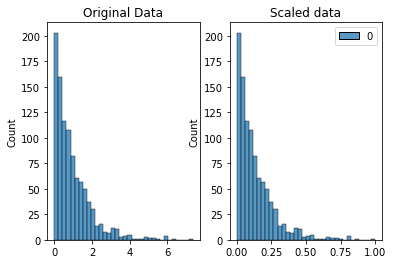

In [19]:
from mlxtend.preprocessing import minmax_scaling

original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

## Normaliseren

Schalen verandert alleen het bereik van uw gegevens. Normalisatie is een radicalere transformatie. Het punt van normalisatie is om je waarnemingen te veranderen, zodat ze kunnen worden beschreven als een normale verdeling.

Over het algemeen wilt u uw gegevens alleen normaliseren als u een machine learning- of statistiektechniek gaat gebruiken die ervan uitgaat dat uw gegevens normaal verdeeld zijn. Enkele voorbeelden hiervan zijn t-tests, ANOVA's, lineaire regressie, lineaire discriminantanalyse (LDA) en Gauss-naïeve Bayes.

De methode die werd gebruikt om hier te normaliseren, wordt de Box-Cox-transformatie genoemd. Laten we even kijken hoe het normaliseren van sommige gegevens eruitziet:

Text(0.5, 1.0, 'Normalized data')

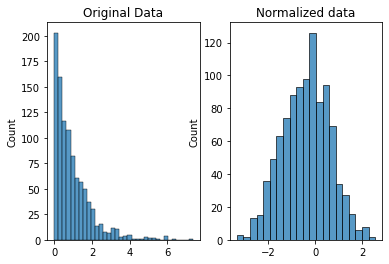

In [20]:
from scipy import stats

# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Na de datacleaning stappen kunnen we best nog eens EDA opstarten. EDA in combinatie met Data cleaning is een iteratief process.

Er bestaat ook een low code library die dit alles wat kan vergemakkelijken.

In [21]:
# Standard Library Imports
from pathlib import Path

# Read the Titanic Dataset
file_name = cache_file(
    "titanic.csv",
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
)
titanic = pd.read_csv(file_name)


In [22]:
titanic.drop(columns="Name",inplace=True)

In [23]:
from pycaret.classification import *

clf1 = setup(titanic, target = 'Survived', silent=True, session_id=123, log_experiment=False, experiment_name='Survived')

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
X = get_config('X')
X.shape

(891, 568)

In [25]:
clf1 = setup(titanic, target = 'Survived', normalize = True ,silent=True, session_id=123, log_experiment=False, experiment_name='Survived')

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
X = get_config('X')
X.head().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Cabin_F E69,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Cabin_not_available,Embarked_C,Embarked_Q,Embarked_S
0,-0.620440,-0.480292,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,0.638427,0.699093,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,-0.305723,-0.467859,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
3,0.402390,0.364187,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.402390,-0.465557,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

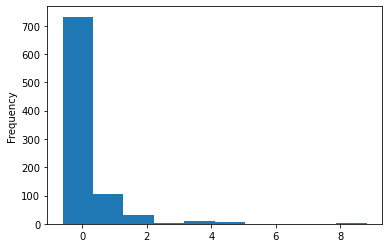

In [27]:
X.Fare.plot.hist()

In [28]:
clf1 = setup(titanic, target = 'Survived', transformation = True ,silent=True, session_id=123, log_experiment=False, experiment_name='Survived')

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
X = get_config('X')
X.head().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Cabin_F E69,Cabin_F33,Cabin_F38,Cabin_G6,Cabin_T,Cabin_not_available,Embarked_C,Embarked_Q,Embarked_S,Embarked_not_available
0,-0.585410,-0.839834,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1,0.658780,1.306386,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,-0.261811,-0.753659,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,0.434577,1.046076,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.434577,-0.738490,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


<AxesSubplot:ylabel='Frequency'>

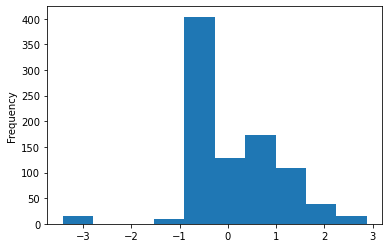

In [30]:
X.Fare.plot.hist()